# Signal-to-noise Ratio
The signal-to-noise ratio (SNR) is a measure of the strength of a signal compared to the level of background noise present in the signal. It is expressed as a ratio of the power of the signal to the power of the noise, often measured in decibels (dB).

A high SNR indicates that the signal is stronger relative to the noise, while a low SNR indicates that the signal is weaker and harder to distinguish from the noise.
In digital image processing, a high SNR means that the image has a high level of detail and is free from visual noise, while a low SNR can result in grainy or blurred images.



The Signal-to-Noise Ratio (SNR) equation can be written as:

$ \text{SNR (dB)} = 10 \cdot \log_{10} \left( \frac{\text{Signal Power}}{\text{Noise Power}} \right) $

This equation calculates the SNR in decibels (dB), where:
- $\text{Signal Power}$ is the power of the signal of interest.
- $\text{Noise Power}$ is the power of the background noise.
- $\log_{10}$ is the base-10 logarithm, used to express the ratio in decibels.

The SNR measures the level of the signal compared to the level of noise. A higher SNR indicates a clearer signal with less noise interference.

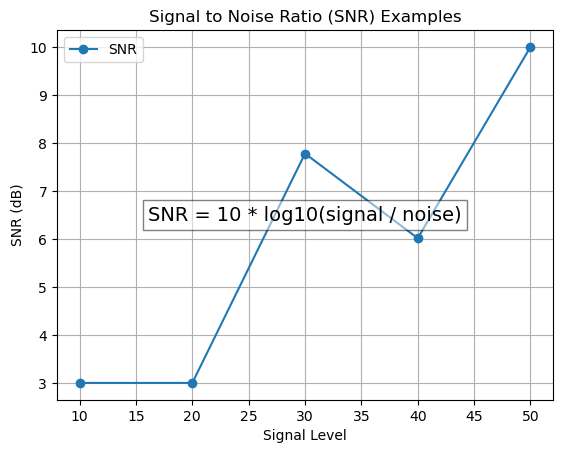

In [4]:
from matplotlib import pyplot as plt
import numpy as np

# Define the signal-to-noise ratio (SNR) formula as a function
def snr(signal, noise):
    return 10 * np.log10(signal / noise)

# Create a figure and axis for plotting
fig, ax = plt.subplots()

# Example values for signal and noise levels
signals = np.array([10, 20, 30, 40, 50])
noises = np.array([5, 10, 5, 10, 5])

# Calculate SNR values
snr_values = snr(signals, noises)

# Plot SNR examples
ax.plot(signals, snr_values, 'o-', label='SNR')

# Annotate the graph with the SNR formula
ax.text(0.5, 0.5, 'SNR = 10 * log10(signal / noise)', transform=ax.transAxes,
        fontsize=14, va='center', ha='center', bbox=dict(facecolor='white', alpha=0.5))

# Set graph labels and title
ax.set_xlabel('Signal Level')
ax.set_ylabel('SNR (dB)')
ax.set_title('Signal to Noise Ratio (SNR) Examples')
ax.legend()

# Show grid
ax.grid(True)

# Save the figure
plt.show()


# Peak signal-to-noise ratio
Peak signal-to-noise ratio (PSNR) shows the ratio between the maximum possible power of a signal and the power of the same image with noise. PSNR is usually expressed in logarithmic decibel scale.

$MSE =1/m*n \sum_{i=0}^{m-1} \sum_{j=0}^{n-1}  [   Image( i,j)  -NoisyImage( i,j)  ]  ^2
$

$PSNR =10* \log_{10} \Bigg(MAXI^2/MSE\Bigg)$


### Explanation

1. **Loading the Image**: The original image `ref` is loaded from a file.
2. **Adding Noise**: Two types of noise are demonstrated - salt & pepper and Gaussian. The `amount` parameter for salt & pepper and `mean`, `var` for Gaussian control the noise intensity.
3. **Calculating MSE**: The Mean Squared Error is calculated between the noisy and the original images. It measures the average squared difference between the original and noisy pixel values.
   - **MSE Equation**: $ MSE = \frac{1}{MN} \sum_{i=1}^{M} \sum_{j=1}^{N} (A(i,j) - ref(i,j))^2 $
4. **Calculating PSNR**: The Peak Signal-to-Noise Ratio is a measure of the peak signal power to the power of the distortion (noise) and is expressed in decibels (dB).
   - **PSNR Equation**: $ PSNR = 10 \cdot \log_{10} \left( \frac{MAXI^2}{MSE} \right) $
   where $MAXI$ is the maximum possible pixel value of the image.
5. **Displaying Images**: The original, noisy, and squared error images can be displayed for visual comparison.
6. **Using `skimage.metrics` for PSNR**: This library provides a straightforward method to calculate PSNR, offering an alternative to manual calculation.

This translated code performs similar operations in Python as the original MATLAB code, showing how to work with image noise, calculate MSE, and evaluate PSNR for assessing image quality.


The Peak-SNR value is 8.254214439068678


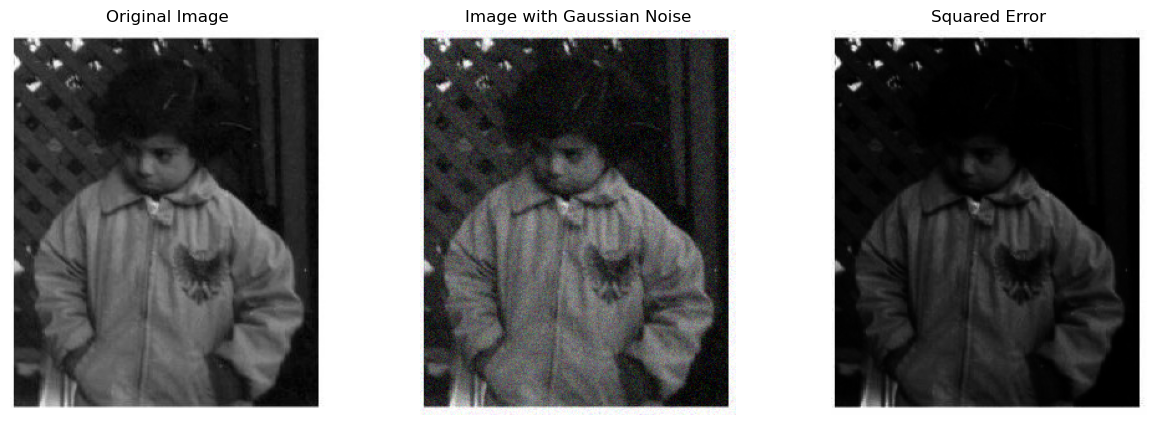

In [18]:
from skimage import io, util, metrics
import numpy as np

# Load an image (example with a placeholder path)
ref = io.imread('images/pout.jpg')

# Add salt & pepper noise
A_sp = util.random_noise(ref, mode='s&p', amount=0.02)

# Or, add Gaussian noise
A_gaussian = util.random_noise(ref, mode='gaussian', mean=0, var=0.003)

# Calculate MSE
M, N = ref.shape[:2]  # Assuming grayscale; for color images, handle channels accordingly
SE = (A_sp.astype(float) - ref.astype(float)) ** 2  # Squared Error for salt & pepper example
MSE = np.sum(SE) / (M * N)

MAXI = 255
PSNR = 10 * np.log10((MAXI**2) / MSE)

# Display images and SE (using matplotlib.pyplot.imshow for example)
# imshow(A_sp, []), imshow(ref, []), imshow(SE, [])

# Compute PSNR using skimage.metrics (for the salt & pepper example)
peaksnr = metrics.peak_signal_noise_ratio(ref, A_sp, data_range=ref.max() - ref.min())
print(f'\nThe Peak-SNR value is {peaksnr}')

SE_gaussian = (A_gaussian.astype(float) - ref.astype(float)) ** 2
SE_gaussian_normalized = SE_gaussian / SE_gaussian.max()


fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(ref, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(A_gaussian, cmap='gray')
axes[1].set_title('Image with Gaussian Noise')
axes[1].axis('off')

axes[2].imshow(SE_gaussian_normalized, cmap='gray')
axes[2].set_title('Squared Error')
axes[2].axis('off')

plt.show()



- The **Original Image** remains unchanged, showcasing the grayscale content without noise.
- The **Image with Gaussian Noise** also remains the same, depicting the added grainy texture due to noise.
- The **Normalized Squared Error** image, which is now properly normalized, illustrates the error distribution between the original and noisy images without the warning. In this visualization, brighter areas represent higher discrepancies caused by the noise, enabling a clearer understanding of its impact.

By normalizing the squared error data to the range [0, 1], we ensure compatibility with matplotlib's expectations for image data, effectively addressing the warning and improving the clarity of the displayed error image.